In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from scipy import interpolate

path2 = '../../../data/2017_12_22/'

In [2]:
cy20_1 = np.loadtxt(path2+'1706-VOA_sweep_20cy.tsv') # 1552.38 +- 0.01 nm # 0.35:161:0.75 # 100 ms
print(cy20_1.shape, '--> %d loops, %d samples per loop' %(6440/161/2,161*2))
cy20_2 = np.loadtxt(path2+'1727-VOA_sweep_20cy.tsv') # 1552.30 +- 0.01 nm # 0.30:101:0.55 # 100 ms # 700 uW
print(cy20_2.shape, '--> %d loops, %d samples per loop' %(4040/101/2,101*2))
cy20_3 = np.loadtxt(path2+'1734-VOA_sweep_20cy.tsv') # 1552.20 +- 0.01 nm # 0.30:041:0.40 # 100 ms # 690 uW
print(cy20_3.shape, '--> %d loops, %d samples per loop' %(1640/41/2,41*2))

(6440, 2) --> 20 loops, 322 samples per loop
(4040, 2) --> 20 loops, 202 samples per loop
(1640, 2) --> 20 loops, 82 samples per loop


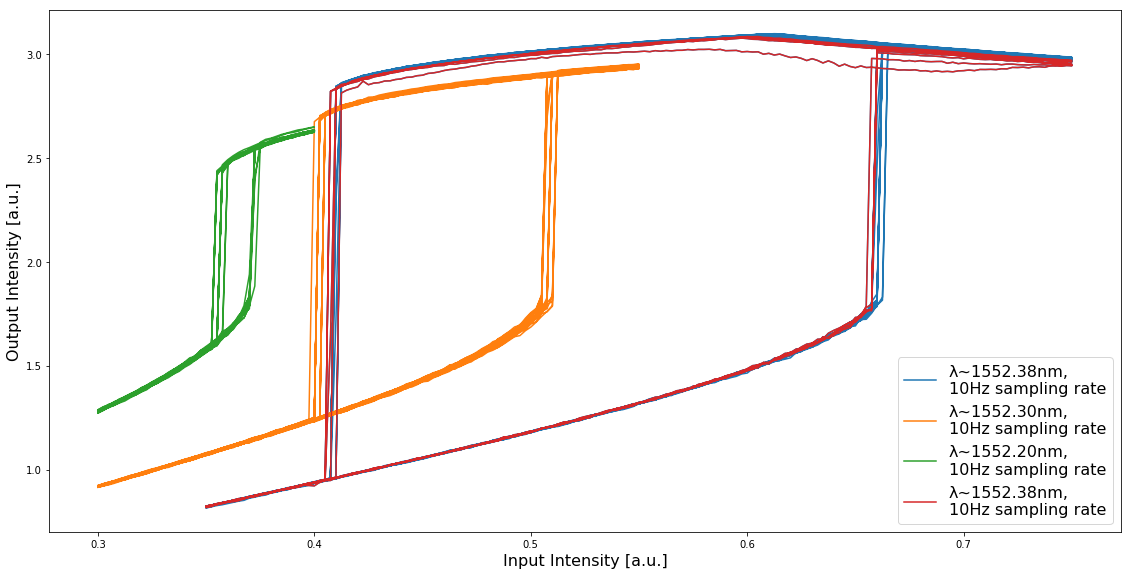

In [3]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ax1.plot( cy20_1[:,0], cy20_1[:,1], label='λ~1552.38nm,\n10Hz sampling rate')
ax1.plot( cy20_2[:,0], cy20_2[:,1], label='λ~1552.30nm,\n10Hz sampling rate')
ax1.plot( cy20_3[:,0], cy20_3[:,1], label='λ~1552.20nm,\n10Hz sampling rate')

################## !!! ---- !!! #####################
###                                               ###
###    cut last 1/4 of data from the first run    ###
###      due to lab door opened: the measure      ###
###         was not anymore under control         ###
###                                               ###
################## !!! ---- !!! #####################
nn = 15
mm = 161*2
ax1.plot( cy20_1[mm*(nn):,0], cy20_1[mm*(nn):,1], label='λ~1552.38nm,\n10Hz sampling rate')

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

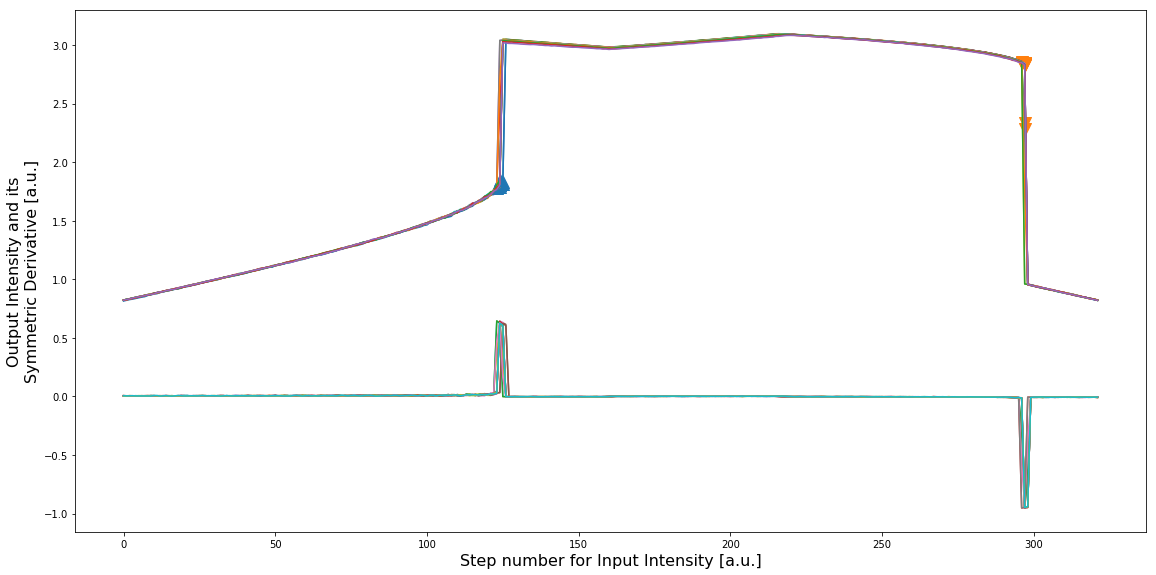

In [4]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

cc = plt.rcParams['axes.prop_cycle'].by_key()['color']

datax = cy20_1[:322*15,0]
datay = cy20_1[:322*15,1]
temp = np.transpose(datay.reshape(15,322))

ax1.plot(temp[:,:], label='λ~1552.38nm,\n10Hz sampling rate')
ax1.plot(np.gradient(temp,axis=0), label='λ~1552.38nm,\n10Hz sampling rate')

idx1 = np.argmax(np.diff(temp, axis=0), axis=0)
ax1.scatter(idx1, temp[idx1,range(15)], marker='^', s=12**2)
    
idx2 = np.argmin(np.diff(temp, axis=0), axis=0)
ax1.scatter(idx2, temp[idx2,range(15)], marker='v', s=12**2)

#ax1.plot(cy20_2[:1000,1], label='λ~1552.30nm,\n10Hz sampling rate')
#ax1.plot(cy20_3[:1000,1], label='λ~1552.20nm,\n10Hz sampling rate')

ax1.set_xlabel('Step number for Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
#ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

In [5]:
def loop_stat(datax, datay, loops, ppl):
    # transform data in more suitable shape
    mdatax = np.transpose( datax.reshape(loops, ppl) )
    mdatay = np.transpose( datay.reshape(loops, ppl) )
    
    # calculare finite difference, or gradient
    #dif_datay = np.gradient(mdatay, axis=0)
    dif_datay = np.diff(mdatay, axis=0)
    
    # find maxima and minima, i.e. upper and lower bistability limits
    mdatay_max = np.argmax(dif_datay, axis=0)
    mdatay_min = np.argmin(dif_datay, axis=0)
    
    # return reshaped data (1,2) and bistability limits (3,4)
    return mdatax, mdatay, mdatay_max, mdatay_min

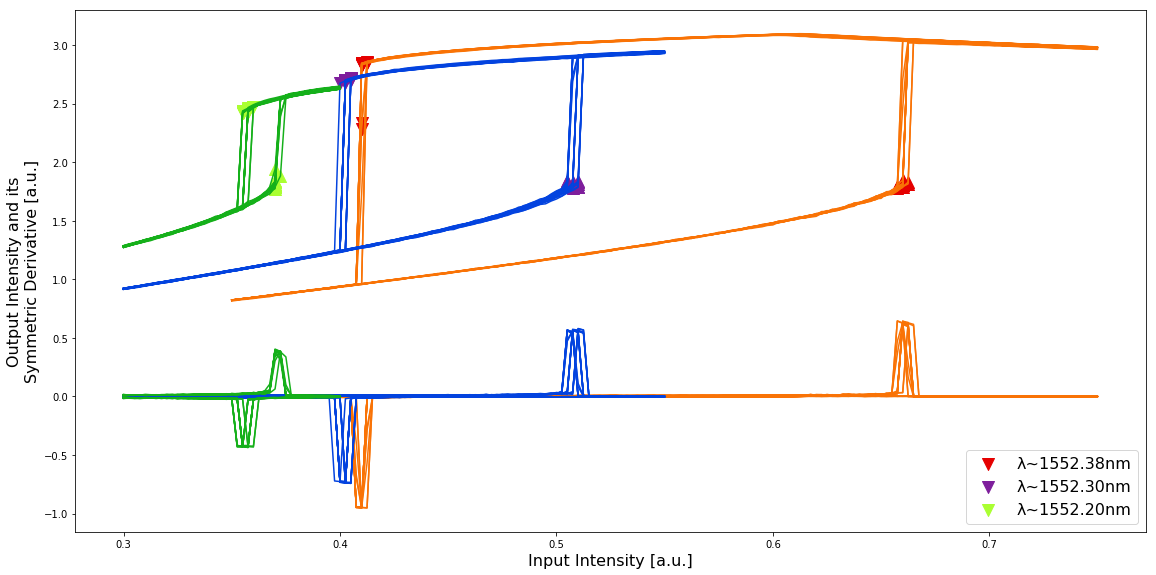

In [6]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

#ax1.set_prop_cycle('color',plt.cm.Blues(np.linspace(0.5,1,15)))

# cy20_1, λ~1552.38 nm, 2*161  samples/loop

s1dx, s1dy, s1iM, s1im = loop_stat(cy20_1[:322*15,0], cy20_1[:322*15,1], 15, 322)

ax1.plot(s1dx, s1dy, c='xkcd:orange' )
ax1.plot(s1dx, np.gradient(s1dy, axis=0), c='xkcd:orange' )
ax1.scatter(s1dx[s1iM,range(15)], s1dy[s1iM,range(15)], marker='^', s=12**2, c='xkcd:red' )
ax1.scatter(s1dx[s1im,range(15)], s1dy[s1im,range(15)], marker='v', s=12**2, c='xkcd:red', label='λ~1552.38nm' )

# cy20_2, λ~1552.30 nm, 2*101  samples/loop

s2dx, s2dy, s2iM, s2im = loop_stat(cy20_2[:202*20,0], cy20_2[:202*20,1], 20, 202)

ax1.plot(s2dx, s2dy, c='xkcd:blue' )
ax1.plot(s2dx, np.gradient(s2dy, axis=0), c='xkcd:blue' )
ax1.scatter(s2dx[s2iM,range(20)], s2dy[s2iM,range(20)], marker='^', s=12**2, c='xkcd:purple' )
ax1.scatter(s2dx[s2im,range(20)], s2dy[s2im,range(20)], marker='v', s=12**2, c='xkcd:purple', label='λ~1552.30nm' )

# cy20_3, λ~1552.20 nm, 2*41 samples/loop

s3dx, s3dy, s3iM, s3im = loop_stat(cy20_3[:82*20,0], cy20_3[:82*20,1], 20, 82)

ax1.plot(s3dx, s3dy, c='xkcd:green' )
ax1.plot(s3dx, np.gradient(s3dy, axis=0), c='xkcd:green' )
ax1.scatter(s3dx[s3iM,range(20)], s3dy[s3iM,range(20)], marker='^', s=12**2, c='xkcd:lime' )
ax1.scatter(s3dx[s3im,range(20)], s3dy[s3im,range(20)], marker='v', s=12**2, c='xkcd:lime', label='λ~1552.20nm' )

#####
ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

In [9]:
print('λ~1552.38nm')
print('max %.3f'%np.mean(s1dx[s1iM,range(15)]), ' ± %.4f'%np.std(s1dx[s1iM,range(15)]) )
print('min %.3f'%np.mean(s1dx[s1im,range(15)]), ' ± %.4f'%np.std(s1dx[s1im,range(15)]) )
print('λ~1552.30nm')
print('max %.3f'%np.mean(s2dx[s2iM,range(20)]), ' ± %.4f'%np.std(s2dx[s2iM,range(20)]) )
print('min %.3f'%np.mean(s2dx[s2im,range(20)]), ' ± %.4f'%np.std(s2dx[s2im,range(20)]) )
print('λ~1552.20nm')
print('max %.3f'%np.mean(s3dx[s3iM,range(20)]), ' ± %.4f'%np.std(s3dx[s3iM,range(20)]) )
print('min %.3f'%np.mean(s3dx[s3im,range(20)]), ' ± %.4f'%np.std(s3dx[s3im,range(20)]) )

print()
print('max and min are the upper and lower limits of the bistability regime')
print('the values in the x axis are given by the input power, times the transparency ∈[0,1]')

λ~1552.38nm
max 0.660  ± 0.0015
min 0.410  ± 0.0010
λ~1552.30nm
max 0.507  ± 0.0020
min 0.403  ± 0.0013
λ~1552.20nm
max 0.370  ± 0.0005
min 0.357  ± 0.0015

max and min are the upper and lower limits of the bistability regime
the values in the x axis are given by the input power, times the transparency ∈[0,1]


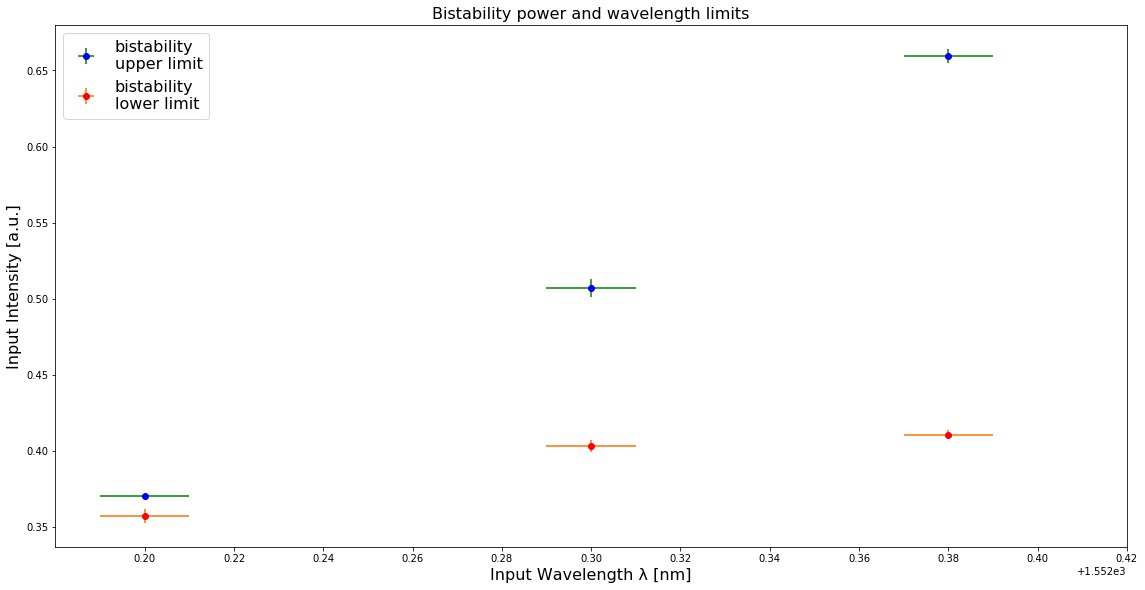

In [8]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

x = [1552.38, 1552.30, 1552.20]
xerr = [0.01, 0.01, 0.01]

ymax = [np.mean(s1dx[s1iM,range(15)]), np.mean(s2dx[s2iM,range(20)]), np.mean(s3dx[s3iM,range(20)])]
ymaxerr = [3*np.std(s1dx[s1iM,range(15)]), 3*np.std(s2dx[s2iM,range(20)]), 3*np.std(s3dx[s3iM,range(20)])]

ymin = [np.mean(s1dx[s1im,range(15)]), np.mean(s2dx[s2im,range(20)]), np.mean(s3dx[s3im,range(20)])]
yminerr = [3*np.std(s1dx[s1im,range(15)]), 3*np.std(s2dx[s2im,range(20)]), 3*np.std(s3dx[s3im,range(20)])]

ax1.errorbar(x, ymax, yerr=ymaxerr, xerr=xerr, fmt='o', c='b', ecolor='g', capthick=2,
             label='bistability\nupper limit')
ax1.errorbar(x, ymin, yerr=yminerr, xerr=xerr, fmt='o', c='r', ecolor='xkcd:orange', capthick=2,
             label='bistability\nlower limit')

ax1.set_title(r'Bistability power and wavelength limits', fontsize = 16)
ax1.set_ylabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_xlabel('Input Wavelength λ [nm]', fontsize = 16)
ax1.legend(loc=2, fontsize=16)

plt.xticks( np.arange(1552.2,1552.42,0.02) )

plt.show()
plt.close()